In [1]:
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

True

In [26]:
import os
import strangeworks

strangeworks.authenticate(username="iraitz", api_key=os.environ["STRWKS_TOKEN"])

In [40]:
from strangeworks.qiskit.provider import StrangeworksProvider

provider = StrangeworksProvider()
'''
provider = StrangeworksProvider(
    hub="strangeworks-hub",
    group="qc-com",
    project="runtime"
)
'''
backend_list = provider.backends()

In [41]:
len(backend_list)

84

In [42]:
for backend in backend_list:
    if "nairobi" in backend.name():
        print(backend)

ibm.strangeworks-ibm.ibm_nairobi


In [25]:
for backend in backend_list:
    if "aws" in backend.name():
        print(backend)

aws.aws-managed.Aspen-10
aws.aws-managed.Aspen-11
aws.aws-managed.Aspen-8
aws.aws-managed.Aspen-9
aws.aws-managed.Aspen-M-1
aws.aws-managed.IonQ Device
aws.aws-managed.SV1
aws.aws-managed.dm1


In [6]:
for backend in backend_list:
    if "azure" in backend.name():
        print(backend)

azure.azure-managed.ionq.qpu
azure.azure-managed.ionq.simulator
azure.azure-managed.honeywell.hqs-lt-s1
azure.azure-managed.honeywell.hqs-lt-s1-apival
azure.azure-managed.honeywell.hqs-lt-s2
azure.azure-managed.honeywell.hqs-lt-s2-apival
azure.azure-managed.honeywell.hqs-lt-s1-sim


In [6]:
ionq = provider.get_backend("aws.aws-managed.IonQ Device")
ionq.status()

In [7]:
conf = ionq.configuration()
conf.to_dict()

{'backend_name': 'IonQ Device',
 'backend_version': '1.0.0',
 'n_qubits': 11,
 'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id'],
 'gates': [{'name': 'u1',
   'parameters': ['theta'],
   'qasm_def': None,
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]},
  {'name': 'u2',
   'parameters': ['phi', 'lam'],
   'qasm_def': None,
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]},
  {'name': 'u3',
   'parameters': ['theta', 'phi', 'lam'],
   'qasm_def': None,
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]},
  {'name': 'cx',
   'parameters': [],
   'qasm_def': 'Populates self.definition with a decomposition of this gate.'},
  {'name': 'id',
   'parameters': [],
   'qasm_def': 'Populates self.definition with a decomposition of this gate.',
   'coupling_map': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]}],
 'local': False,
 'simulator': False,
 'conditional': False,
 'open_pulse': False,
 'memory': False,

In [21]:
rigetti = provider.get_backend("aws.aws-managed.Aspen-M-1")
rigetti.status()

In [22]:
conf = rigetti.configuration()
conf.to_dict()

{'backend_name': 'Aspen-M-1',
 'backend_version': '1.0.0',
 'n_qubits': 80,
 'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id'],
 'gates': [{'name': 'u1',
   'parameters': ['theta'],
   'qasm_def': None,
   'coupling_map': [[0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [8],
    [9],
    [10],
    [11],
    [12],
    [13],
    [14],
    [15],
    [16],
    [17],
    [18],
    [19],
    [20],
    [21],
    [22],
    [23],
    [24],
    [25],
    [26],
    [27],
    [28],
    [29],
    [30],
    [31],
    [32],
    [33],
    [34],
    [35],
    [36],
    [37],
    [38],
    [39],
    [40],
    [41],
    [42],
    [43],
    [44],
    [45],
    [46],
    [47],
    [48],
    [49],
    [50],
    [51],
    [52],
    [53],
    [54],
    [55],
    [56],
    [57],
    [58],
    [59],
    [60],
    [61],
    [62],
    [63],
    [64],
    [65],
    [66],
    [67],
    [68],
    [69],
    [70],
    [71],
    [72],
    [73],
    [74],
    [75],
    [76],
    [77],
    [78],
    [

In [7]:
honeywell = provider.get_backend("azure.azure-managed.honeywell.hqs-lt-s2")
honeywell.status()

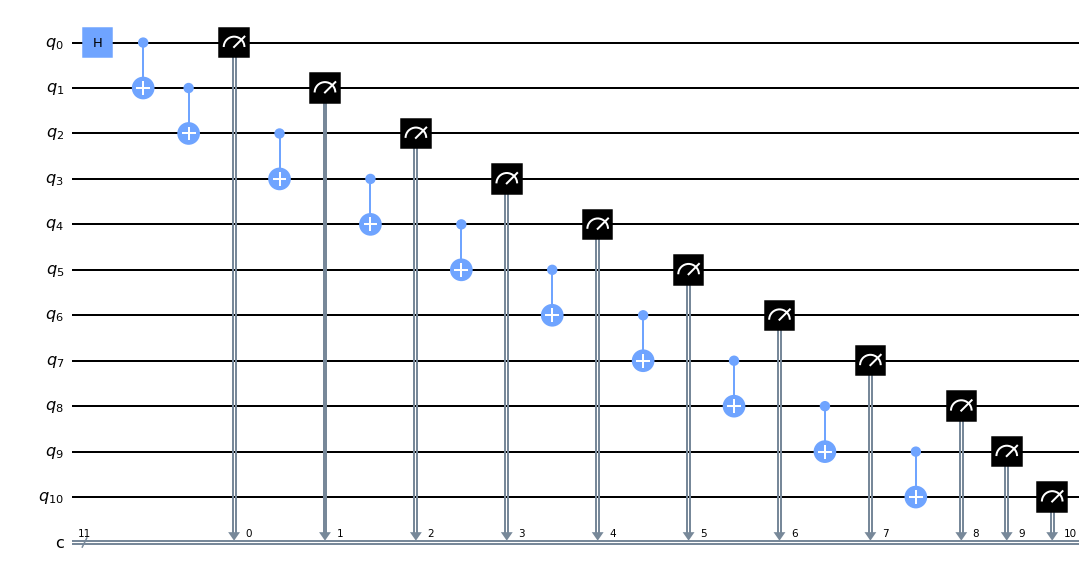

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(11, 11)
qc.h(0)
for i in range(10):
    qc.cnot(i, i+1)
qc.measure(range(11), range(11))

qc.draw('mpl')

In [11]:
job = ionq.run(qc, shots=50)
print(f"id: {job.job_id()}, status: {job.status()}")

id: purple-frog-4061, status: JobStatus.INITIALIZING


In [16]:
print(f"id: {job.job_id()}, status: {job.status()}")

id: purple-frog-4061, status: JobStatus.DONE


In [17]:
results = job.result()
results.get_counts()

{'00000000000': 21,
 '00000000001': 1,
 '00000001011': 1,
 '00000001111': 1,
 '00111111111': 2,
 '11111111000': 1,
 '11111111101': 1,
 '11111111110': 1,
 '11111111111': 21}

In [24]:
job2 = rigetti.run(qc, shots=50)
print(f"id: {job2.job_id()}, status: {job2.status()}")

id: lucid-chamber-0957, status: JobStatus.INITIALIZING


In [27]:
print(f"id: {job2.job_id()}, status: {job2.status()}")

id: lucid-chamber-0957, status: JobStatus.DONE


In [28]:
results = job2.result()
results.get_counts()

{'00000000110': 1,
 '00000001001': 1,
 '00001010100': 1,
 '00001101101': 1,
 '00001101111': 1,
 '00010111011': 1,
 '00011100000': 1,
 '00100000001': 1,
 '00100000100': 1,
 '00100000111': 1,
 '00100001010': 1,
 '00100001110': 1,
 '00100010010': 1,
 '00100011100': 1,
 '00100100101': 1,
 '00100110001': 1,
 '00100110100': 1,
 '00101000011': 1,
 '00101000111': 1,
 '00101011011': 1,
 '00110111110': 1,
 '01000010001': 1,
 '01000100001': 1,
 '01000111001': 1,
 '01000111111': 1,
 '01001000101': 1,
 '01001100010': 1,
 '01010010100': 1,
 '01100001101': 1,
 '01100011010': 1,
 '01100011011': 1,
 '01100110100': 1,
 '01101001100': 1,
 '01101100010': 1,
 '01110000101': 1,
 '01110100110': 1,
 '01110101001': 1,
 '10000110010': 1,
 '10001011011': 1,
 '10001111110': 1,
 '10100000100': 1,
 '10100010010': 1,
 '10100100111': 1,
 '10100101110': 1,
 '10100110001': 1,
 '10101111010': 1,
 '11000001010': 1,
 '11000101110': 1,
 '11100010001': 1,
 '11101001101': 1}

In [10]:
job3 = honeywell.run(qc, shots=50)
print(f"id: {job3.job_id()}, status: {job3.status()}")

c:\Users\iraitz.montalban\Documents\GitHub\GHZbenchmark\.venv\lib\site-packages\IPython\core\interactiveshell.py:3361: UserWarning: shots is not a recognized runtime option and may be ignored by the backend.
  exec(code_obj, self.user_global_ns, self.user_ns)


id: rough-rock-0746, status: JobStatus.QUEUED


In [44]:
print(f"id: {job3.job_id()}, status: {job3.status()}")

id: rough-rock-0746, status: JobStatus.QUEUED


In [ ]:
results = job3.result()
results.get_counts()